In [1]:
import numpy as np
import scipy.special as sp
import pylab

In [2]:
def func(t,A,B):
    return A*sp.jn(2,t)+B*t

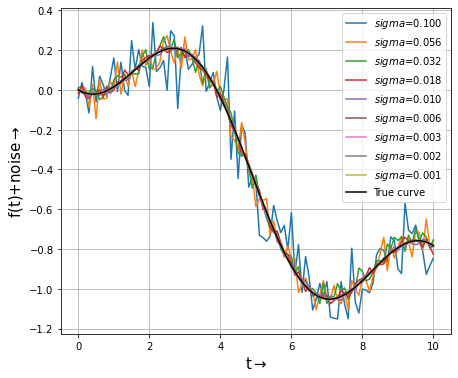

In [3]:
dataColumns=[]
dataColumns=np.loadtxt('fitting.dat',dtype=float)
t=np.array(dataColumns[:,0])            # Creating An Array T
f=np.asarray(dataColumns)[:,1:]         # Converting The Input Into An Array
sigma=np.logspace(-1,-3,9)              # Numbers Spaced Evenly On A Log Scale.
pylab.figure(figsize=(7,6))             # Creating A New Figure
# Plotting The Data
for i in range(9):
    pylab.plot(t,f[:,i],label=r'$sigma$=%.3f'%sigma[i])
pylab.plot(t,func(t,1.05,-0.105),'-k',label='True curve')   # Ploting y vs x As Lines And Markers
pylab.legend(loc='upper right')                             # Placing A Legend On The Top Right Corner Of The Graph
pylab.xlabel(r't$\rightarrow$',fontsize=15)                 # Setting The Label For The x-axis
pylab.ylabel(r'f(t)+noise$\rightarrow$',fontsize=15)        # Setting The Label For The y-axis
pylab.grid(True)                                            # Displaying The Grid

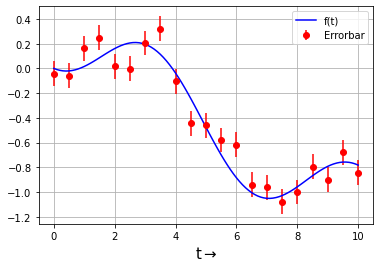

In [4]:
data=f[:,0]
pylab.errorbar(t[::5],data[::5],sigma[0],fmt='ro',label='Errorbar') # Ploting y vs x As Lines And Markers With Attached Error Bars
pylab.plot(t,func(t,1.05,-0.105),'b',label='f(t)')                  # Ploting y vs x As Lines And Markers
pylab.legend(loc='upper right')                                     # Placing A Legend On The Top Right Corner Of The Graph
pylab.xlabel(r't$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.grid(True)                                                    # Displaying The Grid

In [5]:
x=sp.jn(2,t)
M=pylab.c_[x,t]
b=np.array([1.05,-0.105])
Lhs=np.matmul(M,b)      # Matrix Multiplication
Rhs=np.array(func(t,1.05,-0.105))
np.allclose(Lhs,Rhs)    # Testing Equality

True

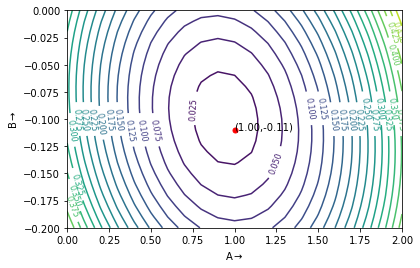

In [6]:
error=np.zeros((21,21,9))           # Creating A Array Filled With Zeros
A=np.linspace(0,2,21)               # Creating Evenly Spaced Numbers Over A Specified Interval
B=np.linspace(-0.2,0,21)            # Creating Evenly Spaced Numbers Over A Specified Interval
for k in range(9):
    err=f[:,k]
    for i in range(21):
        for j in range(21):
            error[i][j][k] = np.sum((err-np.array(func(t,A[i],B[j])))**2)/101   # Storing The Errors
# Plotting The Contour And The Minima
Contour=pylab.contour(A,B,error[:,:,0],20)      # Plotting Contours
pylab.xlabel(r'A$\rightarrow$')                 # Set The Label For The x-axis
pylab.ylabel(r'B$\rightarrow$')                 # Set The Label For The y-axis
pylab.clabel(Contour,inline=1,fontsize=8)       # Labelling The Contour Plot
'''
Using np.unravel_index To Obtain The Location Of The Minimum
FInding The Indices Of The Minimum Values Along An Axis
Converting An Array Of Flat Indices Into A Tuple Of Coordinate Arrays
'''
Min=np.unravel_index(np.argmin(error[:,:,0]),error[:,:,0].shape)
pylab.plot(A[Min[0]],B[Min[1]],'or',markersize=5)                               # Ploting y vs x As Lines And Markers
pylab.annotate('(%0.2f,%0.2f)'%(A[Min[0]],B[Min[1]]),(A[Min[0]],B[Min[1]]))     # Annotating The Points xy With Text
pylab.grid(False)                   # Removing The Grid

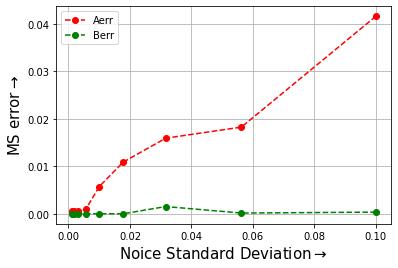

In [7]:
mse=[np.linalg.lstsq(M,f[:,i])[0] for i in range(9)]                        # Calculating The Least Squares Solution
mse=np.asarray(mse)                                                         # Converting The Input Into An Array
errorA = abs(mse[:,0]-1.05)                                                 # Absolute Value Of Error
errorB = abs(mse[:,1]+0.105)                                                # Absolute Value Of Error
pylab.plot(sigma,errorA,'ro--',label='Aerr')                                # Plotting errorA
pylab.plot(sigma,errorB,'go--',label='Berr')                                # Plotting errorB
pylab.legend(loc='upper left')                                              # Placing A Legend On The Top Left Corner Of The Graph
pylab.xlabel(r'Noice Standard Deviation$\rightarrow$',fontsize=15)          # Setting The Label For The x-axis
pylab.ylabel(r'MS error$\rightarrow$',fontsize=15)                          # Setting The Label For The y-axis
pylab.grid(True)                                                            # Displaying The Grid

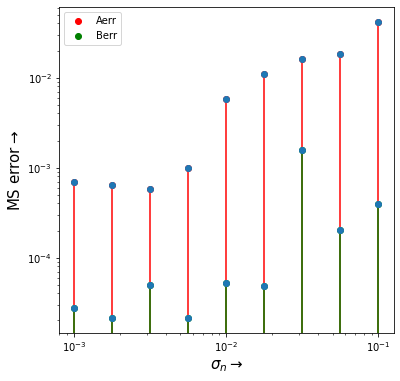

In [8]:
pylab.figure(figsize=(6,6))                                 # Creating A New Figure
pylab.loglog(sigma,errorA,'ro',label='Aerr')                # Making A Plot With Log Scaling On Both Axis
pylab.stem(sigma,errorA,'-ro')                              # Creating A Stem Plot
pylab.loglog(sigma,errorB,'go',label='Berr')                # Making A Plot With Log Scaling On Both Axis
pylab.stem(sigma,errorB,'-go')                            # Creating A Stem Plot
pylab.legend(loc='upper left')                              # Placing A Legend On The Top Left Corner Of The Graph
pylab.xlabel(r'$\sigma_{n}\rightarrow$',fontsize=15)        # Setting The Label For The x-axis
pylab.ylabel(r'MS error$\rightarrow$',fontsize=15)          # Setting The Label For The y-axis
pylab.grid(False)                                           # Removing The Grid